# Introduction

This notebook performs a detailed financial analysis of three leading tech companies - Apple, Microsoft, and Tesla, using data manually extracted from their 10-K filings for the past three fiscal years. The goal is to uncover key trends and metrics that could drive insights for an AI-powered financial chatbot.

# Importing Libraries

In [ ]:
# !pip install pandas
# !pip install seaborn

In [1]:
import pandas as pd
import seaborn as sns

# Loading CSV

In [2]:
df = pd.read_csv('10-K_Data.csv')
df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow
0,Microsoft,2024,245122,88136,512163,243686,118548
1,Microsoft,2023,211915,72361,411976,205753,87582
2,Microsoft,2022,198270,72738,364840,198298,89035
3,Tesla,2024,97690,7153,122070,48390,14923
4,Tesla,2023,96773,14974,106618,43009,13256


# Data Analysis

## Revenue & Net Income Growth

In [3]:
df.sort_values(by=['Company', 'Fiscal Year'], inplace=True)

# Revenue Growth (%)
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100

# Net Income Growth (%)
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100

df[['Company', 'Fiscal Year', 'Total Revenue', 'Revenue Growth (%)', 'Net Income', 'Net Income Growth (%)']]


,Company,Fiscal Year,Total Revenue,Revenue Growth (%),Net Income,Net Income Growth (%)
8,Apple,2022,394328,NaN,99803,NaN
7,Apple,2023,383285,-2.800461,96995,-2.813543
6,Apple,2024,391035,2.021994,93736,-3.359967
2,Microsoft,2022,198270,NaN,72738,NaN
1,Microsoft,2023,211915,6.882030,72361,-0.518299
0,Microsoft,2024,245122,15.669962,88136,21.800417
5,Tesla,2022,81462,NaN,12587,NaN
4,Tesla,2023,96773,18.795267,14974,18.964010
3,Tesla,2024,97690,0.947578,7153,-52.230533


## Profitability Analysis

In [5]:
df['Net Profit Margin (%)'] = (df['Net Income'] / df['Total Revenue']) * 100
df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Revenue Growth (%),Net Income Growth (%),Net Profit Margin (%)
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,25.309641
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,25.306234
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,23.971256
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN,36.686337
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,34.146238


## Cash Flow vs Net Income

In [7]:
df['Cash Conversion Ratio'] = df['Operating Cash Flow'] / df['Net Income']
df.head()

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Revenue Growth (%),Net Income Growth (%),Net Profit Margin (%),Cash Conversion Ratio
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,25.309641,1.223921
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,25.306234,1.139677
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,23.971256,1.261564
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN,36.686337,1.224051
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,34.146238,1.210348


## Volatility & Risk

In [9]:
volatility = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)']].std()
volatility

,Revenue Growth (%),Net Income Growth (%)
Company,,
Apple,3.409990,0.386380
Microsoft,6.214007,15.781715
Tesla,12.620221,50.342144


## Rank Companies Each Year

In [12]:
df['Revenue Rank'] = df.groupby('Fiscal Year')['Total Revenue'].rank(ascending=False)
df['Income Rank'] = df.groupby('Fiscal Year')['Net Income'].rank(ascending=False)
df

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Revenue Growth (%),Net Income Growth (%),Net Profit Margin (%),Cash Conversion Ratio,Revenue Rank,Income Rank
8,Apple,2022,394328,99803,352755,302083,122151,NaN,NaN,25.309641,1.223921,1.0,1.0
7,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,25.306234,1.139677,1.0,1.0
6,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,23.971256,1.261564,1.0,1.0
2,Microsoft,2022,198270,72738,364840,198298,89035,NaN,NaN,36.686337,1.224051,2.0,2.0
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,34.146238,1.210348,2.0,2.0
0,Microsoft,2024,245122,88136,512163,243686,118548,15.669962,21.800417,35.955973,1.345058,2.0,2.0
5,Tesla,2022,81462,12587,82338,36440,14724,NaN,NaN,15.451376,1.169778,3.0,3.0
4,Tesla,2023,96773,14974,106618,43009,13256,18.795267,18.964010,15.473324,0.885268,3.0,3.0
3,Tesla,2024,97690,7153,122070,48390,14923,0.947578,-52.230533,7.322141,2.086258,3.0,3.0


## Visualizations

<Axes: xlabel='Fiscal Year', ylabel='Net Profit Margin (%)'>

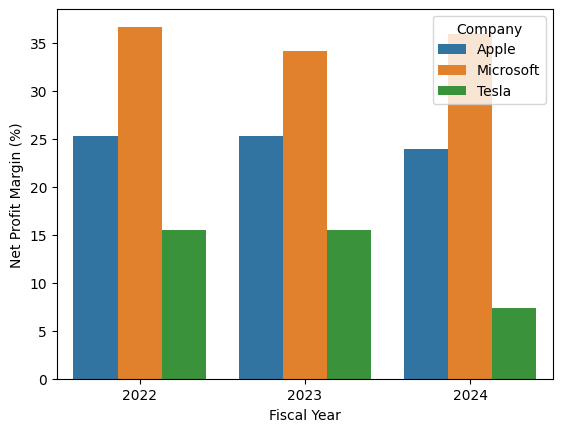

In [13]:
sns.barplot(data=df, x='Fiscal Year', y='Net Profit Margin (%)', hue='Company')

# Findings

* Microsoft is in a strong growth phase, improving both revenue and profitability.

* Apple is maintaining stable revenue but is experiencing steady declines in net income, which could signal cost pressures or a maturing product line.

* Tesla faces the highest risk: though revenue remains high, profitability is deteriorating rapidly, requiring immediate strategic adjustments.

Overall, **Apple** and **Microsoft** emerge as financially strong, stable, and efficient companies, with Apple consistently leading in revenue and income, and Microsoft outperforming in profit margins and cash efficiency. Both show low volatility, indicating predictable performance. In contrast, **Tesla** demonstrates higher growth potential, but with significant risks; its declining profit margin, inconsistent cash flow, and extremely high volatility make it a less stable option. While Tesla may appeal to high-risk investors, Apple and Microsoft present more reliable financial profiles, making them suitable for long-term, low-risk investment strategies.


# Rule-based ChatBot

This is a simple rule-based chatbot built in Python to answer predefined financial questions about Apple, Microsoft, and Tesla using insights from 10-K data (2022–2024).

In [1]:
# !pip install flask


[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
def simple_chatbot(user_query):
    qna = {
    "What is Microsoft's total revenue in 2024?":
        "Microsoft's total revenue in 2024 was $245,122 million.",
    
    "How much did Tesla's net income change from 2023 to 2024?":
        "Tesla's net income decreased from $14,974 million in 2023 to $7,153 million in 2024, a drop of approximately 52.23%.",
    
    "Which company had the highest operating cash flow in 2024?":
        "Microsoft had the highest operating cash flow in 2024 with $118,548 million.",
    
    "What were Apple's total assets in 2023?":
        "Apple's total assets in 2023 were $352,583 million.",
    
    "Which company had the highest net income in 2024?":
        "Microsoft had the highest net income in 2024 with $88,136 million."
    }
    
    return qna.get(user_query, "Sorry, I can only answer predefined questions.")

while True:
    user_input = input("Ask a question (or type 'exit'): ")
    if user_input.lower() == "exit":
        print("Goodbye!")
        break
    print(simple_chatbot(user_input))


Ask a question (or type 'exit'):  Which company had the highest net income in 2024?


Microsoft had the highest net income in 2024 with $88,136 million.


Ask a question (or type 'exit'):  exit


Goodbye!


## Limitations:
- The chatbot only responds to exact predefined questions.
- It does not understand variations or free-form text.
- Answers are static and not dynamically generated from a database.